In [1]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3 as sql
import re
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
suicide_all = pd.read_csv("suicide_all.csv")

In [4]:
suicide_all

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,14:08:06,1207 MCGAVOCK ST,SUICIDAL PERSON,2
1,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2
2,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2
3,July,C,07-02-2021,06:23:06,1221 BROADWAY,SUICIDAL PERSON,2
4,July,C,07-02-2021,11:07:14,705 DREXEL ST,SUICIDAL PERSON,2
...,...,...,...,...,...,...,...
1720,March,W,03-23-2022,06:41:49,6700 CABOT DR,SUICIDAL PERSON,2M
1721,March,W,03-27-2022,07:54:28,329 SUSANNAH CT,SUICIDAL PERSON,3
1722,March,W,03-28-2022,19:23:55,517 RIVER ROUGE DR,SUICIDAL PERSON,3
1723,March,W,03-29-2022,14:01:59,8109 BOONE TRCE,SUICIDAL PERSON,2M


In [5]:
suicide_all = suicide_all.loc[(suicide_all['Precinct'] == 'C') 
            | (suicide_all['Precinct'] == 'S') 
            | (suicide_all['Precinct'] == 'M') 
            | (suicide_all['Precinct'] == 'MT') 
            | (suicide_all['Precinct'] == 'E') 
            | (suicide_all['Precinct'] == 'W') 
            | (suicide_all['Precinct'] == 'N') 
            | (suicide_all['Precinct'] == 'H')]
suicide_all

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,14:08:06,1207 MCGAVOCK ST,SUICIDAL PERSON,2
1,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2
2,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2
3,July,C,07-02-2021,06:23:06,1221 BROADWAY,SUICIDAL PERSON,2
4,July,C,07-02-2021,11:07:14,705 DREXEL ST,SUICIDAL PERSON,2
...,...,...,...,...,...,...,...
1720,March,W,03-23-2022,06:41:49,6700 CABOT DR,SUICIDAL PERSON,2M
1721,March,W,03-27-2022,07:54:28,329 SUSANNAH CT,SUICIDAL PERSON,3
1722,March,W,03-28-2022,19:23:55,517 RIVER ROUGE DR,SUICIDAL PERSON,3
1723,March,W,03-29-2022,14:01:59,8109 BOONE TRCE,SUICIDAL PERSON,2M


In [6]:
suicide_all_10AM_10PM = suicide_all[suicide_all['Created'].between('10:00:00', '21:59:59')]
suicide_all_10AM_10PM

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,14:08:06,1207 MCGAVOCK ST,SUICIDAL PERSON,2
1,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2
4,July,C,07-02-2021,11:07:14,705 DREXEL ST,SUICIDAL PERSON,2
6,July,C,07-04-2021,21:59:08,500 REP JOHN LEWIS WAY N,SUICIDAL PERSON,2
10,July,C,07-07-2021,13:45:19,526 8TH AVE S,SUICIDAL PERSON,2
...,...,...,...,...,...,...,...
1718,March,W,03-21-2022,16:23:38,610 SYLVAN HEIGHTS WAY,SUICIDAL PERSON,3
1719,March,W,03-22-2022,11:33:02,2602 HILLMEADE DR,SUICIDAL PERSON,2M
1722,March,W,03-28-2022,19:23:55,517 RIVER ROUGE DR,SUICIDAL PERSON,3
1723,March,W,03-29-2022,14:01:59,8109 BOONE TRCE,SUICIDAL PERSON,2M


In [7]:
suicide_all_10PM_10AM = suicide_all[~suicide_all['Created'].between('10:00:00', '21:59:59')]
suicide_all_10PM_10AM

,Month,Precinct,Date,Created,Address,Incident Type,Priority
2,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2
3,July,C,07-02-2021,06:23:06,1221 BROADWAY,SUICIDAL PERSON,2
5,July,C,07-03-2021,03:37:59,639 LAFAYETTE ST,SUICIDAL PERSON,2
7,July,C,07-05-2021,01:03:16,MCGAVOCK ST / 10TH AVE S,SUICIDAL PERSON,2M
8,July,C,07-06-2021,22:41:17,JEFFERSON ST / 4TH AVE N,SUICIDAL PERSON,2
...,...,...,...,...,...,...,...
1714,March,W,03-10-2022,01:19:55,4419 TENNESSEE AVE,SUICIDAL PERSON,2M
1716,March,W,03-15-2022,09:56:04,4500 POST RD,SUICIDAL PERSON,3
1717,March,W,03-19-2022,22:05:50,5731 RIVER RD,SUICIDAL PERSON,2M
1720,March,W,03-23-2022,06:41:49,6700 CABOT DR,SUICIDAL PERSON,2M


# Central - Night - 168

In [8]:
S_Calls_C_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="C"]

In [9]:
S_Calls_C_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 2 to 1552
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          168 non-null    object
 1   Precinct       168 non-null    object
 2   Date           168 non-null    object
 3   Created        168 non-null    object
 4   Address        168 non-null    object
 5   Incident Type  168 non-null    object
 6   Priority       168 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


# Hermitage - Night - 97

In [10]:
S_Calls_H_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="H"]

In [11]:
S_Calls_H_Night

,Month,Precinct,Date,Created,Address,Incident Type,Priority
66,July,H,07-01-2021,06:54:32,501 ERMAC DR,SUICIDAL PERSON,2M
71,July,H,07-03-2021,02:44:27,5400 OLD HICKORY BLVD,SUICIDAL PERSON,2
74,July,H,07-05-2021,23:25:41,104 LEWIS ST,SUICIDAL PERSON,2
77,July,H,07-07-2021,01:09:17,4701 OLD HICKORY BLVD,SUICIDAL PERSON,2
79,July,H,07-07-2021,23:50:11,1102 CLEVES ST,SUICIDAL PERSON,2
82,July,H,07-10-2021,02:45:23,87 MAURY ST,SUICIDAL PERSON,3
83,July,H,07-11-2021,05:32:04,4661 FOREST RIDGE DR,SUICIDAL PERSON,3
84,July,H,07-11-2021,08:30:36,6004 ELIJAH CT,SUICIDAL PERSON,2
88,July,H,07-15-2021,06:14:31,710 MURFREESBORO PIKE,SUICIDAL PERSON,2
89,July,H,07-15-2021,07:38:32,201 CAMERON CT,SUICIDAL PERSON,2


In [12]:
S_Calls_H_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 66 to 1603
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          97 non-null     object
 1   Precinct       97 non-null     object
 2   Date           97 non-null     object
 3   Created        97 non-null     object
 4   Address        97 non-null     object
 5   Incident Type  97 non-null     object
 6   Priority       97 non-null     object
dtypes: object(7)
memory usage: 6.1+ KB


# South - Night - 82

In [13]:
S_Calls_S_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="S"]

In [14]:
S_Calls_S_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 164 to 1710
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          82 non-null     object
 1   Precinct       82 non-null     object
 2   Date           82 non-null     object
 3   Created        82 non-null     object
 4   Address        82 non-null     object
 5   Incident Type  82 non-null     object
 6   Priority       82 non-null     object
dtypes: object(7)
memory usage: 5.1+ KB


# North - Night - 57

In [15]:
S_Calls_N_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="N"]

In [16]:
S_Calls_N_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 140 to 1681
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          57 non-null     object
 1   Precinct       57 non-null     object
 2   Date           57 non-null     object
 3   Created        57 non-null     object
 4   Address        57 non-null     object
 5   Incident Type  57 non-null     object
 6   Priority       57 non-null     object
dtypes: object(7)
memory usage: 3.6+ KB


# Madison - Night - 49

In [17]:
S_Calls_M_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="M"]

In [18]:
S_Calls_M_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 107 to 1634
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          49 non-null     object
 1   Precinct       49 non-null     object
 2   Date           49 non-null     object
 3   Created        49 non-null     object
 4   Address        49 non-null     object
 5   Incident Type  49 non-null     object
 6   Priority       49 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


# Midtown Hills - Night - 62

In [19]:
S_Calls_MT_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="MT"]

In [20]:
S_Calls_MT_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 116 to 1655
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          62 non-null     object
 1   Precinct       62 non-null     object
 2   Date           62 non-null     object
 3   Created        62 non-null     object
 4   Address        62 non-null     object
 5   Incident Type  62 non-null     object
 6   Priority       62 non-null     object
dtypes: object(7)
memory usage: 3.9+ KB


# West - Night - 43

In [21]:
S_Calls_W_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="W"]

In [22]:
S_Calls_W_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 187 to 1721
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          43 non-null     object
 1   Precinct       43 non-null     object
 2   Date           43 non-null     object
 3   Created        43 non-null     object
 4   Address        43 non-null     object
 5   Incident Type  43 non-null     object
 6   Priority       43 non-null     object
dtypes: object(7)
memory usage: 2.7+ KB


# East - Night - 30

In [23]:
S_Calls_E_Night = suicide_all_10PM_10AM.loc[suicide_all_10PM_10AM["Precinct"]=="E"]

In [24]:
S_Calls_E_Night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 54 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          30 non-null     object
 1   Precinct       30 non-null     object
 2   Date           30 non-null     object
 3   Created        30 non-null     object
 4   Address        30 non-null     object
 5   Incident Type  30 non-null     object
 6   Priority       30 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


# Central - Day - 181

In [25]:
S_Calls_C_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="C"]

In [26]:
S_Calls_C_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 1551
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          181 non-null    object
 1   Precinct       181 non-null    object
 2   Date           181 non-null    object
 3   Created        181 non-null    object
 4   Address        181 non-null    object
 5   Incident Type  181 non-null    object
 6   Priority       181 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


# Hermitage - Day - 187

In [27]:
S_Calls_H_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="H"]

In [28]:
S_Calls_H_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 67 to 1597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          187 non-null    object
 1   Precinct       187 non-null    object
 2   Date           187 non-null    object
 3   Created        187 non-null    object
 4   Address        187 non-null    object
 5   Incident Type  187 non-null    object
 6   Priority       187 non-null    object
dtypes: object(7)
memory usage: 11.7+ KB


# South - Day - 155

In [29]:
S_Calls_S_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="S"]

In [30]:
S_Calls_S_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 163 to 1709
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          155 non-null    object
 1   Precinct       155 non-null    object
 2   Date           155 non-null    object
 3   Created        155 non-null    object
 4   Address        155 non-null    object
 5   Incident Type  155 non-null    object
 6   Priority       155 non-null    object
dtypes: object(7)
memory usage: 9.7+ KB


# North - Day - 161

In [31]:
S_Calls_N_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="N"]

In [32]:
S_Calls_N_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 138 to 1679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          161 non-null    object
 1   Precinct       161 non-null    object
 2   Date           161 non-null    object
 3   Created        161 non-null    object
 4   Address        161 non-null    object
 5   Incident Type  161 non-null    object
 6   Priority       161 non-null    object
dtypes: object(7)
memory usage: 10.1+ KB


# Madison - Day - 135

In [33]:
S_Calls_M_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="M"]

In [34]:
S_Calls_M_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 101 to 1633
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          135 non-null    object
 1   Precinct       135 non-null    object
 2   Date           135 non-null    object
 3   Created        135 non-null    object
 4   Address        135 non-null    object
 5   Incident Type  135 non-null    object
 6   Priority       135 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


# Midtown Hills - Day - 117

In [35]:
S_Calls_MT_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="MT"]

In [36]:
S_Calls_MT_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 118 to 1653
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          117 non-null    object
 1   Precinct       117 non-null    object
 2   Date           117 non-null    object
 3   Created        117 non-null    object
 4   Address        117 non-null    object
 5   Incident Type  117 non-null    object
 6   Priority       117 non-null    object
dtypes: object(7)
memory usage: 7.3+ KB


# West - Day - 98

In [37]:
S_Calls_W_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="W"]

In [38]:
S_Calls_W_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 185 to 1724
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          98 non-null     object
 1   Precinct       98 non-null     object
 2   Date           98 non-null     object
 3   Created        98 non-null     object
 4   Address        98 non-null     object
 5   Incident Type  98 non-null     object
 6   Priority       98 non-null     object
dtypes: object(7)
memory usage: 6.1+ KB


# East - Day - 101

In [39]:
S_Calls_E_Day = suicide_all_10AM_10PM.loc[suicide_all_10AM_10PM["Precinct"]=="E"]

In [40]:
S_Calls_E_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 55 to 1570
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          101 non-null    object
 1   Precinct       101 non-null    object
 2   Date           101 non-null    object
 3   Created        101 non-null    object
 4   Address        101 non-null    object
 5   Incident Type  101 non-null    object
 6   Priority       101 non-null    object
dtypes: object(7)
memory usage: 6.3+ KB


# create a table of Precinct C displaying day and night counts

In [41]:
suicide_all

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,14:08:06,1207 MCGAVOCK ST,SUICIDAL PERSON,2
1,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2
2,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2
3,July,C,07-02-2021,06:23:06,1221 BROADWAY,SUICIDAL PERSON,2
4,July,C,07-02-2021,11:07:14,705 DREXEL ST,SUICIDAL PERSON,2
...,...,...,...,...,...,...,...
1720,March,W,03-23-2022,06:41:49,6700 CABOT DR,SUICIDAL PERSON,2M
1721,March,W,03-27-2022,07:54:28,329 SUSANNAH CT,SUICIDAL PERSON,3
1722,March,W,03-28-2022,19:23:55,517 RIVER ROUGE DR,SUICIDAL PERSON,3
1723,March,W,03-29-2022,14:01:59,8109 BOONE TRCE,SUICIDAL PERSON,2M


In [42]:
suicide_all["Time_Of_Day"] = ""
for index, row in suicide_all.iterrows():
    if ((row.Created > "10:00:00") & (row.Created < "21:59:59")):
        suicide_all.loc[index, "Time_Of_Day"]="Day"
    else: 
        suicide_all.loc[index, "Time_Of_Day"]="Night"
        
suicide_all

C:\Users\dataa\AppData\Local\Temp/ipykernel_16056/3076143356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_all["Time_Of_Day"] = ""
C:\Users\dataa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\dataa\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Month,Precinct,Date,Created,Address,Incident Type,Priority,Time_Of_Day
0,July,C,07-01-2021,14:08:06,1207 MCGAVOCK ST,SUICIDAL PERSON,2,Day
1,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2,Day
2,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2,Night
3,July,C,07-02-2021,06:23:06,1221 BROADWAY,SUICIDAL PERSON,2,Night
4,July,C,07-02-2021,11:07:14,705 DREXEL ST,SUICIDAL PERSON,2,Day
...,...,...,...,...,...,...,...,...
1720,March,W,03-23-2022,06:41:49,6700 CABOT DR,SUICIDAL PERSON,2M,Night
1721,March,W,03-27-2022,07:54:28,329 SUSANNAH CT,SUICIDAL PERSON,3,Night
1722,March,W,03-28-2022,19:23:55,517 RIVER ROUGE DR,SUICIDAL PERSON,3,Day
1723,March,W,03-29-2022,14:01:59,8109 BOONE TRCE,SUICIDAL PERSON,2M,Day


In [43]:
suicide_all["Precinct"].value_counts()

C     349
H     284
S     237
N     218
M     184
MT    179
W     141
E     131
Name: Precinct, dtype: int64

In [44]:
grouped = pd.DataFrame(suicide_all.groupby(["Time_Of_Day", "Precinct"])["Created"].count()).reset_index()

In [45]:
#sns.barplot(x="Precinct", y="Created", date=grouped, hue="Time_Of_Day")

In [46]:
grouped.sort_values(by="Precinct", inplace = True)
grouped.rename(columns = {"Created":"count"}, inplace = True)
grouped

,Time_Of_Day,Precinct,count
0,Day,C,181
8,Night,C,168
1,Day,E,101
9,Night,E,30
2,Day,H,187
10,Night,H,97
3,Day,M,135
11,Night,M,49
4,Day,MT,117
12,Night,MT,62


<AxesSubplot:xlabel='Precinct'>

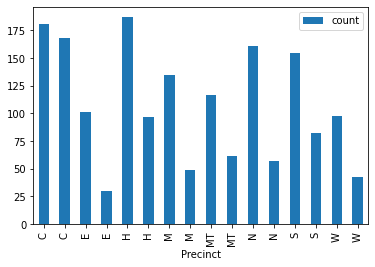

In [47]:
grouped.plot.bar(x="Precinct", y="count")

In [48]:
import plotly.express as px

# Suicidal Person calls by Precinct, Day = 10am - 10pm; Night = 10pm - 10am

In [62]:
px.histogram(grouped, x="Precinct", y="count",
             color='Time_Of_Day', barmode='group',
             height=400, color_discrete_sequence=["blue", "black"], title="Suicidal Calls by Precinct, Day=10am-10pm, Night=10pm-10am")

In [ ]:
#px.histogram(grouped, x="Precinct", y="count",
             color='Time_Of_Day', barmode='group',
             height=400)